## 1. Multipath propagation
[Video Lecture.](https://www.youtube.com/watch?v=sNoBuFUfmGQ&list=PLTv48TzNRhaKb_D7SF3d1eNoqjrTJg34C&index=3)

We consider the scenario when the line-of-sight (LoS) path between the
transmitter and the receiver is blocked. In those cases, there are still
other propagation paths to model. There is the phenomena of scattering
where a signal from transmitter reaches an object, and then it is spreading
out towards the receiver. There are often many such objects in the same
environment, each of them will have a propagation path that is slightly
different. The received signal will be the combination from $L$ paths.
Channel with $L$ propagation paths:
$$g=\sum_{i=1}^{L}{\sqrt{\alpha_i}e^{-j2\pi\frac{d_i-d}{\lambda}}}$$

Where $\alpha_i$ is the channel gain of the $i$ path, $\lambda$ is the
wavelength, $d_i, d$ is the distance of the i-path and reference
distance, respectively,  $-j2\pi\frac{d_i-d}{\lambda}$ describes
the time delay or phase shift.

Let's consider the following example:
- $\alpha_i=\frac{1}{L}$
- $\theta_i=2\pi\frac{d_i-d}{\lambda}\sim U(0,2\pi)$
- Channel magnitude:
$|g|=\left|\sum_{i=1}^{L}{\sqrt{\frac{1}{L}}e^{-j\theta_i}}\right|$
- Rayleigh fading with the approximation of $g\sim CN(0,1)$

Text(1.9, 0.8, 'Rayleigh: $g \\sim CN(0,1)$')

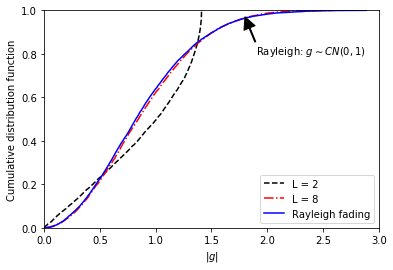

In [48]:
from numpy import pi, exp, sqrt, abs
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal

samples = 10000
l_values = [2, 8]
g_all = np.zeros((len(l_values), samples))
rayleigh = abs(normal(loc=0, scale=sqrt(2)/2, size=(samples, 2)).view(np.complex128) )
for j in range(samples):
    for l_index, l_value in enumerate(l_values):
        g = 0
        for i in range(l_value):
            g = g + sqrt(1/l_value)*exp(-1j*np.random.uniform(0,2*pi))
        g_all[l_index,j] = abs(g)
values, base = np.histogram(g_all[0,:], bins=500)
values2, base2 = np.histogram(g_all[1,:], bins=500)
values3, base3 = np.histogram(rayleigh, bins=500)
#evaluate the cumulative
cumulative = np.cumsum(values)/samples
cumulative2 = np.cumsum(values2)/samples
cumulative3 = np.cumsum(values3)/samples
# plot the cumulative function
plt.plot(base[:-1], cumulative, 'k--',
         base2[:-1], cumulative2, 'r-.',
         base3[:-1], cumulative3, 'b')
plt.legend(['L = 2', 'L = 8', 'Rayleigh fading'], loc='lower right')
plt.xlabel(r'$|g|$')
plt.ylabel('Cumulative distribution function')
plt.xlim([0,3])
plt.ylim([0,1])
plt.annotate(r'Rayleigh: $g \sim CN(0,1)$', xy=(1.8,0.97), xytext=(1.9,0.8),
             arrowprops=dict(width=1, facecolor='black'))

## 2. Rayleigh fading

From the figure, with L = 8, there is a very good approximation of the
real propagation model as the Rayleigh fading channel model. The motivation
behind this model can be achieved using the Central limit theorem.

$\textbf{Central Limit Theorem}$

Let $X_1,\dots,X_L$ be a sequence of $L$ real-valued independent and
identically distributed random variables with zero mean and variance
$\sigma^2$. As $L\to \infty$,
$$\frac{1}{\sqrt{L\sigma^2}}\sum_{i=1}^{L}{X_i}$$
converges to a standard Gaussian distribution $N(0,1)$.

Let's now consider a rich propagation:
- Very large number of paths: Gaussian distribution
- Channel gain: $g\sim CN(0,\beta)$
- It's called Rayleigh fading since $|g|\sim Rayleigh(\sqrt{\beta/2})$

The following example is for $|g|\sim Rayleigh(1/\sqrt{2})$ with $g\sim CN(0,1)$

Text(0.5, 0, '$|g|$')

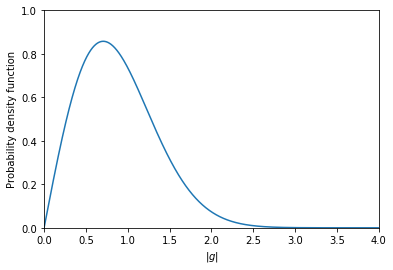

In [10]:
from scipy.stats import rayleigh
import matplotlib.pyplot as plt
import numpy as np

g = np.linspace(0,4,10000)
plt.plot(g, rayleigh.pdf(g, 0, 1/np.sqrt(2)))
plt.xlim([0,4])
plt.ylim(([0,1]))
plt.ylabel('Probability density function')
plt.xlabel(r'$|g|$')

Changing to semilogx figure:

Text(1.4, 0.9, "'Good channel'")

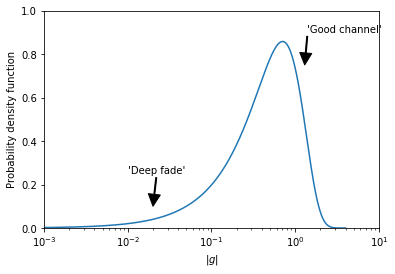

In [30]:
plt.semilogx(g, rayleigh.pdf(g, 0, 1/np.sqrt(2)))
plt.xlim([10**(-3),10**(1)])
plt.ylim(([0,1]))
plt.ylabel('Probability density function')
plt.xlabel(r'$|g|$')
plt.annotate("'Deep fade'", xy=(2*10**(-2), 0.1), xytext=(10**(-2), 0.25),
             arrowprops=dict(width=1, facecolor='black'))
plt.annotate("'Good channel'", xy=(1.3,0.75), xytext=(1.4,0.9),
             arrowprops=dict(width=1, facecolor='black'))

- Many realizations are close to 1, we can say we have good channel.
- Also, there is a substantial probability of the channel very close
zero. With probability of 0.2, the channel gain is down to 0.1.
This is the channel in 'deep fade'.

## 3. Capacity of fading channel
- Consider AWGN channel with a random channel response $g[l]$, where $l$
time index:
  $$y[l] = g[l]\times x[l]+n[l]$$
  - $x[l] \sim CN(0,q)$, energy per sample: $q=P/B$
  - $n[l] \sim CN(0,N_0)$
- We consider two categories of fading:
  - Slow fading: $g[l]$ takes one realization and keeps that value
  during entire transmission of a block.
  - Fast fading: $g[l]$ takes many/all realizations during communications.

### 3.1. Slow fading channel
Consider the received signal: $y[l] = g\times x[l]+n[l]$, with
  - Fixed channel $g[l]=g$ for the entire transmission.
  - Assumption: Receiver knows $g$, but not the transmitter.

The receiver knows $g$ and it can calculate the capacity for a
realization $g$: $$C_g = log_2(1+|g|^2SNR)$$

However, the transmitter does not know $C_g$ and it can not encode
 the data to achieve this capacity. Suppose that the transmitter
 encodes using the rate $R$ bit/s/Hz. There are two possible events here:
- If $R\leq C_g$: Successful transmission
- If $R>C_g$: Large error probability

#### Outage Probability
In this case, we say the system is in outage if $R>C_g$. Then, we
can calculate the outage probability for rate $R$:
$$p_{out}(R)=Pr\{C_g<R\}=Pr\{log_2(1+|g|^2SNR)<R\}$$

With $g\sim CN(0,1)$:
$$p_{out}(R)=Pr\{C_g<R\}=1-e^{-\frac{2^R-1}{SNR}}\approx \frac{2^R-1}{SNR} \text{ with high SNR}$$

The outage probability at high SNR will be inversely proportional
to the SNR for single antenna channel.
#### Outage Capacity
We can define $\epsilon$-Outage capacity $C_{\epsilon}$. It is the
largest rate $R$ that we can communicate with such that
$p_{out}(R)<\epsilon$. It means that with the probability $1-\epsilon$,
we can communicate at $C_\epsilon$ with zero error probability.

With $g\sim CN(0,1)$:
$$C_\epsilon = log_2(1+SNR\ln((1-\epsilon)^{-1}))$$

For AWGN channel: $C_g = log_2(1+|g|^2SNR)=log_2(1+SNR)$
- Low $\epsilon$: Better with AWGN channel.
- High $\epsilon$: Better with fading channel

C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


Text(0.4, 1.4, '$\\epsilon = 1-e^{-1}$')

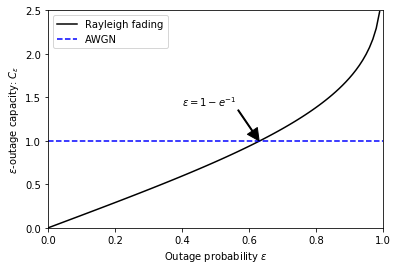

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log2, log

snr_dB = 0 # Consider SNR of 0 dB
snr = 10**(snr_dB/10)
epsilon = np.linspace(0,1,100)
c_g = log2(1+snr)*np.ones(len(epsilon))
c_ep = log2(1+snr*log(1/(1-epsilon)))
plt.plot(epsilon, c_ep, 'k',
         epsilon, c_g, 'b--')
plt.xlim([0, 1])
plt.ylim([0, 2.5])
plt.legend(["Rayleigh fading", "AWGN"])
plt.xlabel(r'Outage probability $\epsilon$')
plt.ylabel(r'$\epsilon$-outage capacity: $C_\epsilon$')
plt.annotate(r'$\epsilon = 1-e^{-1}$', xy=(0.63,1), xytext=(0.4,1.4),
             arrowprops=dict(width=1, facecolor='black'))

#### Outage capacity with small outage probability
Consider the fraction of AWGN capacity:
$\frac{log_2(1+SNR\ln((1-\epsilon)^{-1}))}{log_2(1+SNR)}$

- With small outage probability, the fading channel has much lower
capacity than with AWGN channel.

Text(0, 0.5, 'Fraction of AWGN capacity')

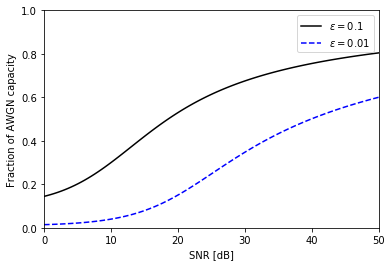

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log2, log

snr_dB = np.linspace(0, 50, 100)
snr = 10**(snr_dB/10)
epsilon = [0.1, 0.01]
fraction = np.zeros((len(epsilon), len(snr_dB)))
for index, e in enumerate(epsilon):
    fraction[index, :] = [log2(1+s*log(1/(1-e)))/log2(1+s) for s in snr]
plt.plot(snr_dB, fraction[0, :], 'k',
         snr_dB, fraction[1, :], 'b--')
plt.xlim([0, 50])
plt.ylim([0, 1])
plt.legend([r'$\epsilon = 0.1$', r'$\epsilon = 0.01$'])
plt.xlabel('SNR [dB]')
plt.ylabel('Fraction of AWGN capacity')

#### Fading multiple antenna channels